# R3
## Ryhmä 6: Javier Jorganes, Senni Rikassaari, Laura Nerg 
## 29.11.2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from orientation import *

In [2]:
# Sets the default figure size for all new Matplotlib plots created after this line
plt.rcParams['figure.figsize'] = (12, 5)

## T. 1 Datan kerääminen ja esikäsittely
1. Kerätkää dataa kyykkytestistä. Voitte käyttää myös aiemmin keräämäänne dataa.

In [3]:
# Creating dataframe and selecting columns
df = pd.read_csv('v2.csv')

time = (df['timestamp'] - df['timestamp'][0])/1000
acc_x = df['x_acc']
acc_y = df['y_acc']
acc_z = df['z_acc']
gyro_x = df['x_gyro']
gyro_y = df['y_gyro']
gyro_z = df['z_gyro']

print(df)

     timestamp     x_acc     y_acc     z_acc  x_gyro  y_gyro  z_gyro  \
0       225913 -3.484074  8.540289 -1.974149  -0.875  26.705  -4.760   
1       225933 -3.460145  8.758043 -1.902362   1.260  22.365  -3.640   
2       225953 -3.441002  8.884868 -2.091402   5.600  14.455  -1.015   
3       225973 -3.819081  8.736507 -2.574769   7.910   3.150   0.980   
4       225992 -3.622863  8.485252 -3.027029   8.855  -8.925   2.835   
..         ...       ...       ...       ...     ...     ...     ...   
583     237474 -3.852582  8.382357 -5.515653  -1.050 -21.770   3.255   
584     237493 -3.129924  8.561825 -5.496510  -9.450 -24.255   4.130   
585     237512 -2.648949  8.511574 -4.869568 -17.325 -17.920   3.395   
586     237532 -2.668093  8.626433 -3.972227 -22.120  -7.875   1.890   
587     237552 -2.589127  8.781973 -2.895419 -24.465   0.700   0.595   

        x_magn     y_magn     z_magn  
0   -37.734238  96.853820 -78.185074  
1   -37.835350  94.472046 -79.307530  
2   -39.617973  95

2. Piirtäkää kuvaajat raakadatasta.
3. Kuvaajien perusteella valitkaa datasta seuraavat osat (segmentit):
    - Alkutilanne (seisonta)
    - Kyykky


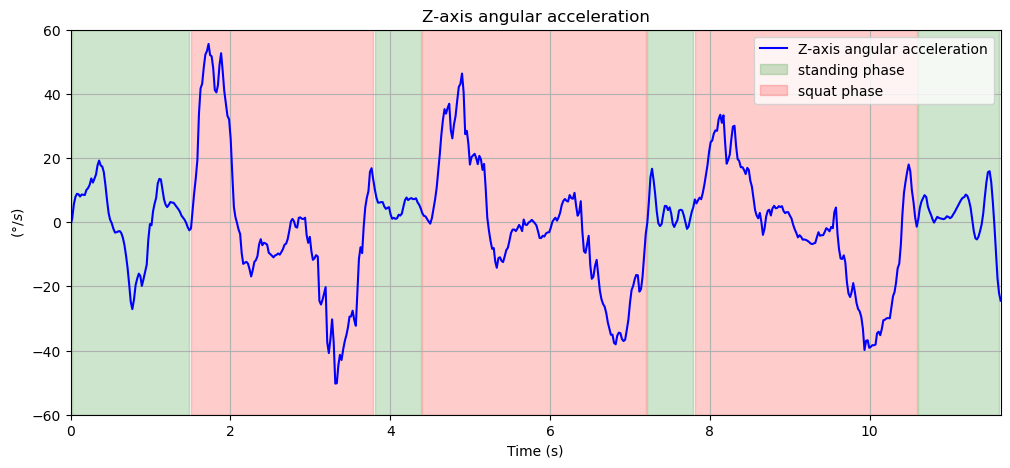

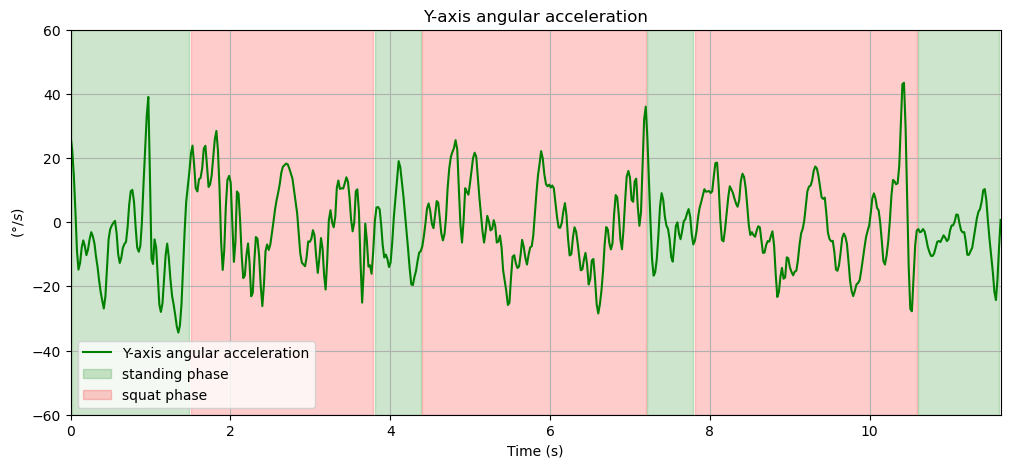

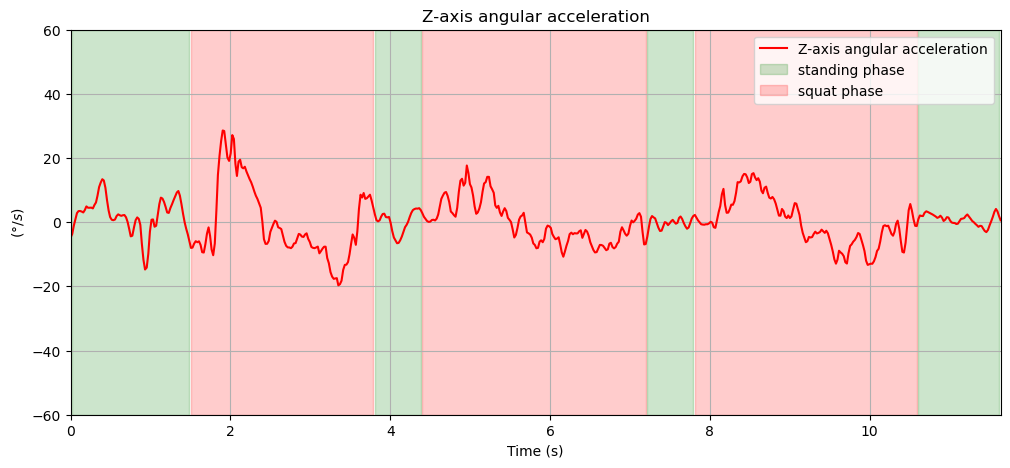

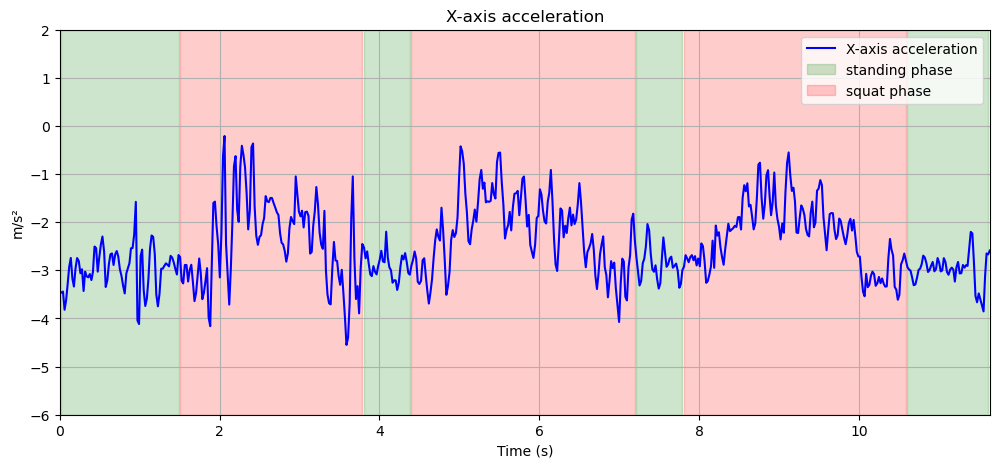

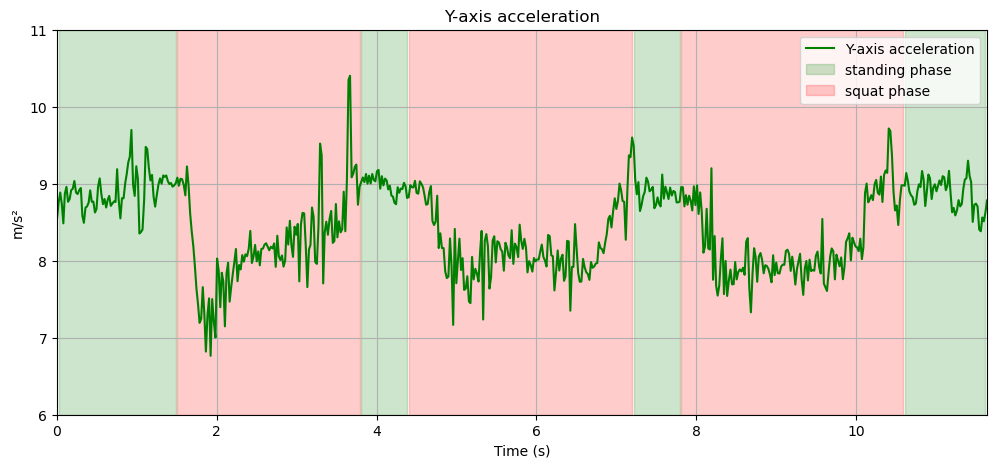

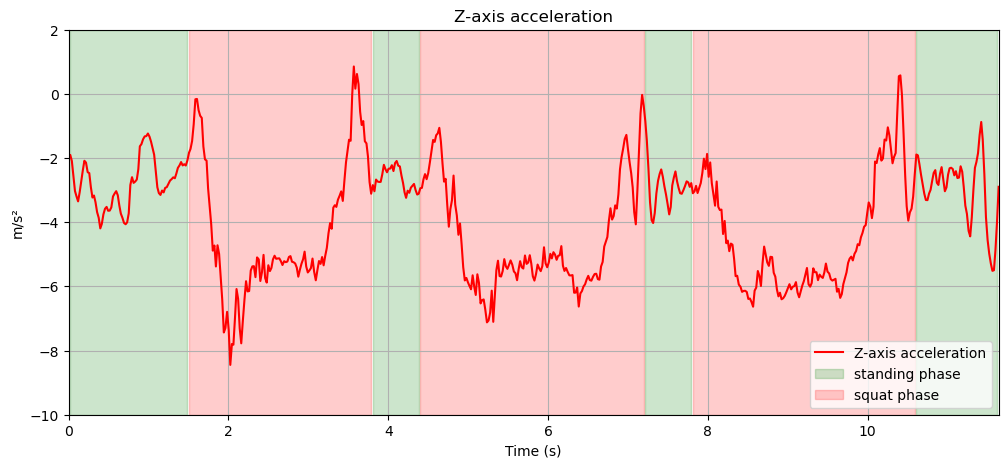

In [4]:
# This function is the one that makes the plots. 
# It can be adjusted when calling it so it should plot different variables with different requirements.

def plot_column_fancy(time, column, ymin, ymax, title, ylabel, xlabel, 
                      mean=None, std=None, wmax=None, wmin=None, 
                      shade_ranges=None, shade_colors=None, shade_labels=None, shade_alpha=0.2, 
                      line_color='blue',save_filename=None):
    plt.plot(time, column, label=title, color=line_color) # Plot the main data line

    used_labels = set() # This set keeps track of labels that have already been used.
    # Set: Collection in Python that is unordered, changeable, and does not allow duplicate elements. Used when its needed to keep track of a unique collection of items.
    if shade_ranges is not None: # Check if there are any shade ranges to plot
        for i, shade_range in enumerate(shade_ranges): # Check if there are any shade ranges to plot
            color = shade_colors[i] if shade_colors and i < len(shade_colors) else 'green'  # Choose the color for the shade; default to 'green' if not enough colors are provided
            label_index = i % len(shade_labels) if shade_labels else 0  # Alternate between the labels
            label = shade_labels[label_index] if shade_labels else f'Shade Area {i+1}'
            
            # Add the shaded area to the shade range on the plot
            if label not in used_labels:
                plt.fill_between(time, 0, 1, 
                                 where=(time > shade_range[0]) & (time < shade_range[1]),
                                 color=color, 
                                 alpha=shade_alpha,
                                 # This line sets the transformation used for the y-coordinates in the fill_between call. Is part of Matplotlib
                                 transform=plt.gca().get_xaxis_transform(), #gca = "Get Current Axes." returns the Axes object of the current plot. If no plot is currently active, it creates a new one.
                                
                                # .get_xaxis_transform() sets up a transformation where:
                                # - The x-coordinates are treated in data units (i.e., based on the actual values of your 'time' data).
                                # - The y-coordinates are treated in axis units (ranging from 0 to 1 along the y-axis of the plot).
                                # This means that the fill will span the entire height of the axes from y=0 (bottom) to y=1 (top),
                                # regardless of the actual numerical range of the y-axis data.
                                # It's useful when you want the shading to cover the full vertical extent of the y-axis,
                                # while the horizontal extent of the shading is determined by the 'time' data.
                                 label=label)
                used_labels.add(label)
            else:
                # Plot without label to avoid duplicate labels in the legend
                plt.fill_between(time, 0, 1, 
                                 where=(time > shade_range[0]) & (time < shade_range[1]),
                                 color=color, 
                                 alpha=shade_alpha, 
                                 transform=plt.gca().get_xaxis_transform())
                
    # Plot additional lines for mean, standard deviation, max, and min if provided
    if mean is not None:
        plt.axhline(mean, color='steelblue', label=f'mean = {mean:.2f}')
    if std is not None:
        plt.fill_between(time, mean-std, mean+std, alpha=0.2, color='cyan', label=f'std = {std:.2f}')
    if wmax is not None:
        plt.axhline(wmax, color='red', linestyle=':', label=f'max = {wmax:.2f}')
    if wmin is not None:
        plt.axhline(wmin, color='green', linestyle=':', label=f'min = {wmin:.2f}')

    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.xlim(time.values[0], time.values[-1]) #Is list then not need for .values: 'time[0], time[-1]'
    plt.ylim(ymin, ymax)
    if save_filename:
        plt.savefig(save_filename, format='png')
    plt.show()

    
# Calling the "plot_column_fancy" function and setting parameters:

plot_column_fancy(
    time=time, 
    column=gyro_x, 
    ymin=-60, 
    ymax=60, 
    title='Z-axis angular acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time.iloc[-1])],  
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'],  
    line_color='blue',
    #save_filename='gyrox-raaka.png'
)
plot_column_fancy(
    time=time, 
    column=gyro_y, 
    ymin=-60, 
    ymax=60, 
    title='Y-axis angular acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time.iloc[-1])],  
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'],    
    line_color='green',
    #save_filename='gyroy-raaka.png'
)
plot_column_fancy(
    time=time, 
    column=gyro_z, 
    ymin=-60, 
    ymax=60, 
    title='Z-axis angular acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time.iloc[-1])],  
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'],   
    line_color='red',
    #save_filename='gyroz-raaka.png'
)
plot_column_fancy(
    time=time, 
    column=acc_x, 
    ymin=-6, 
    ymax=2, 
    title='X-axis acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time.iloc[-1])],  
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'],  
    line_color='blue',
    #save_filename='accx-raaka.png'
)
plot_column_fancy(
    time=time, 
    column=acc_y, 
    ymin=6, 
    ymax=11, 
    title='Y-axis acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time.iloc[-1])],  
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'],  
    line_color='green',
    #save_filename='accy-raaka.png'
)
plot_column_fancy(
    time=time, 
    column=acc_z, 
    ymin=-10, 
    ymax=2, 
    title='Z-axis acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time.iloc[-1])],  
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'],  
    line_color='red',
    #save_filename='accz-raaka.png'
)



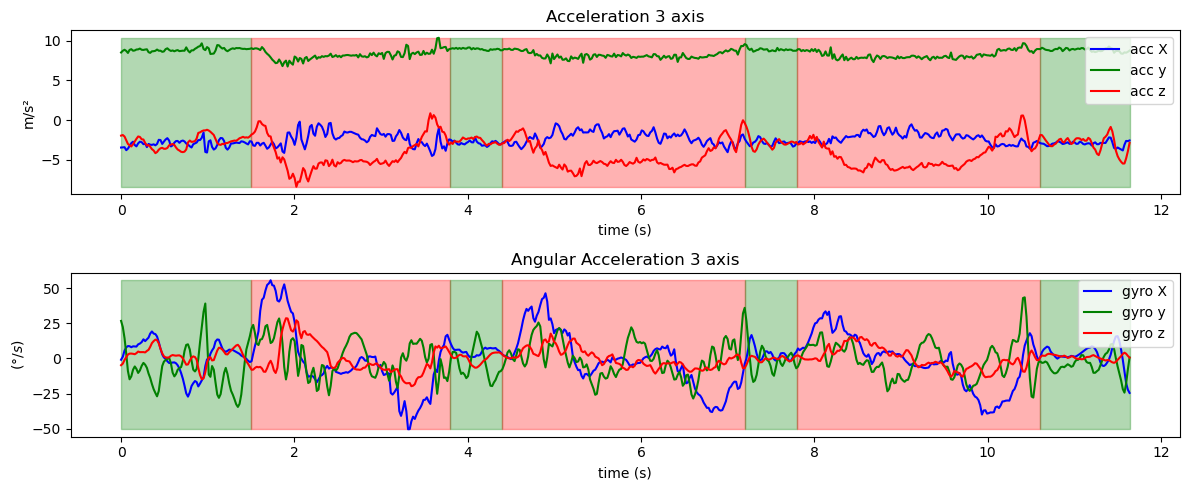

In [5]:
# Below all acc and gyro axis represented in 2 plots
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(time, acc_x, label='acc X', color = 'blue')
ax1.plot(time, acc_y, label='acc y', color = 'green')
ax1.plot(time, acc_z, label='acc z', color = 'red')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('m/s\u00B2')
ax1.set_title('Acceleration 3 axis')
ax1.legend()

ax2.plot(time, gyro_x, label='gyro X', color = 'blue')
ax2.plot(time, gyro_y, label='gyro y', color = 'green')
ax2.plot(time, gyro_z, label='gyro z', color = 'red')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('($\degree/s$)')
ax2.set_title('Angular Acceleration 3 axis')
ax2.legend()

shade_ranges = [(0, 1.5), (1.5, 3.8), (3.8, 4.4), (4.4, 7.2), (7.2, 7.8), (7.8, 10.6), (10.6, time.iloc[-1])]
colors = ['green', 'red']
for i, (start, end) in enumerate(shade_ranges):
    ax1.fill_between(x=[start, end], y1=min(acc_x.min(), acc_y.min(), acc_z.min()), y2=max(acc_x.max(), acc_y.max(), acc_z.max()), color=colors[i % 2], alpha=0.3)
    ax2.fill_between(x=[start, end], y1=min(gyro_x.min(), gyro_y.min(), gyro_z.min()), y2=max(gyro_x.max(), gyro_y.max(), gyro_z.max()), color=colors[i % 2], alpha=0.3)



plt.tight_layout()
plt.show()

4. Tallentakaa segmentit uusiin muuttujiin

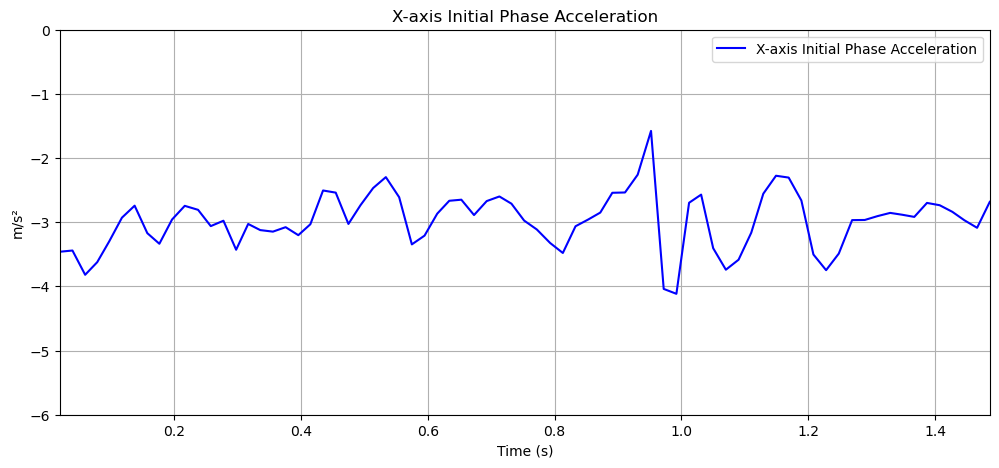

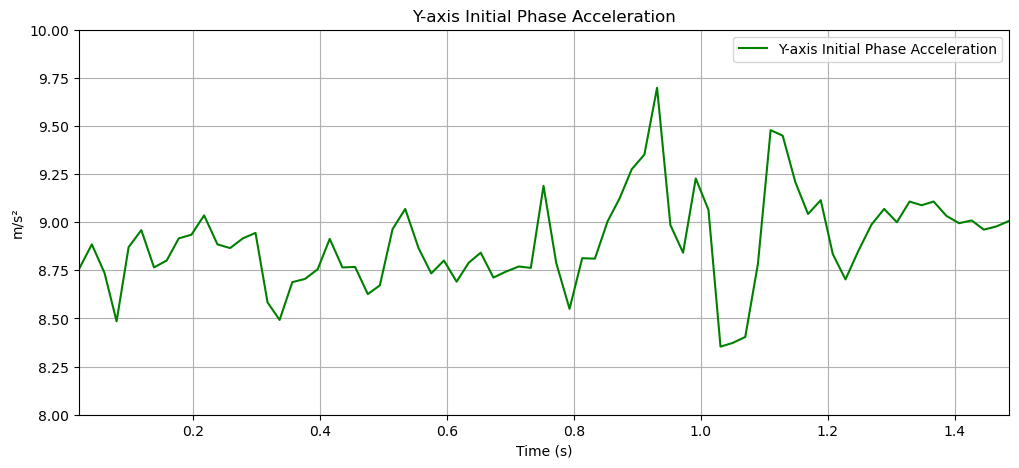

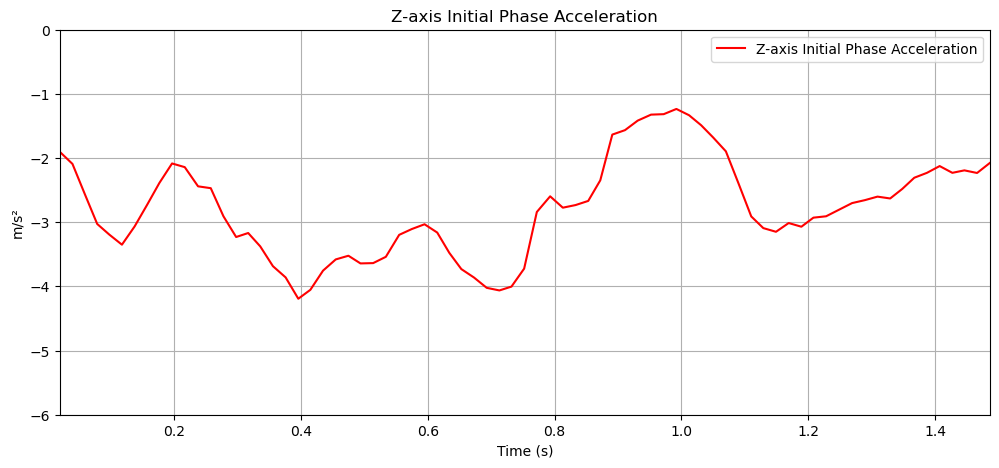

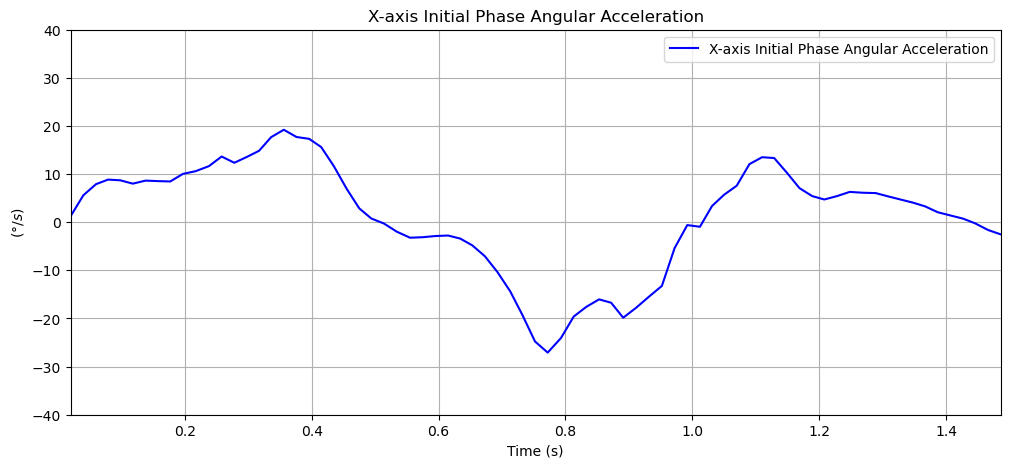

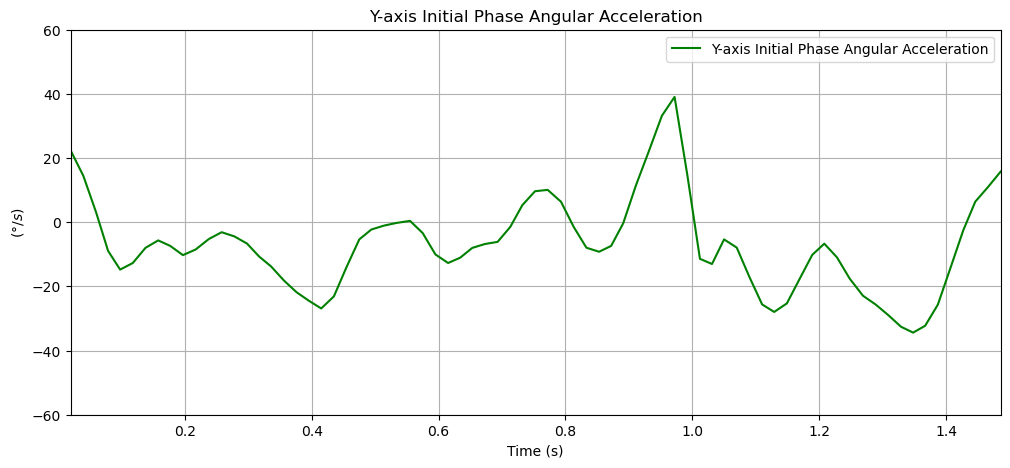

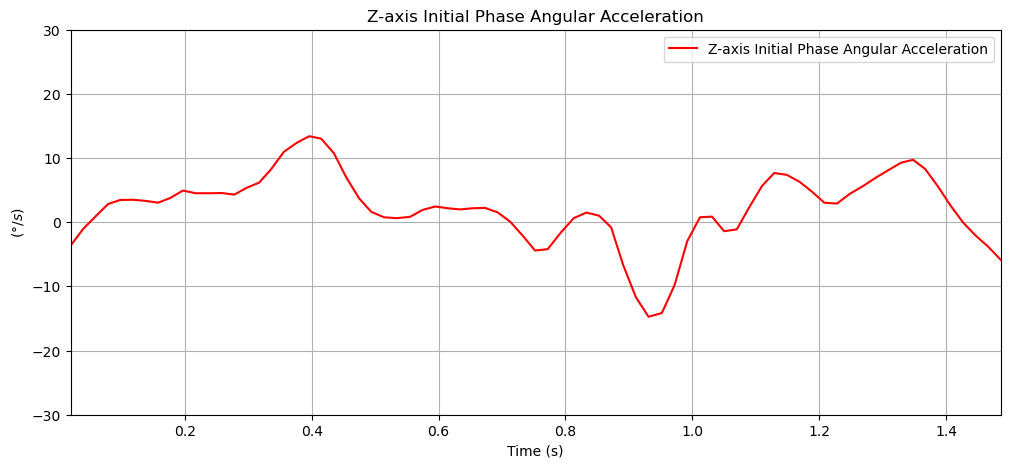

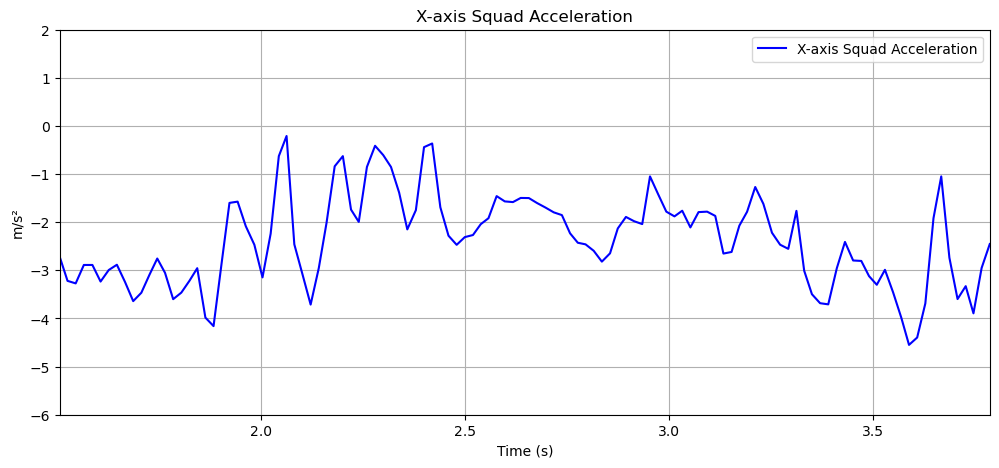

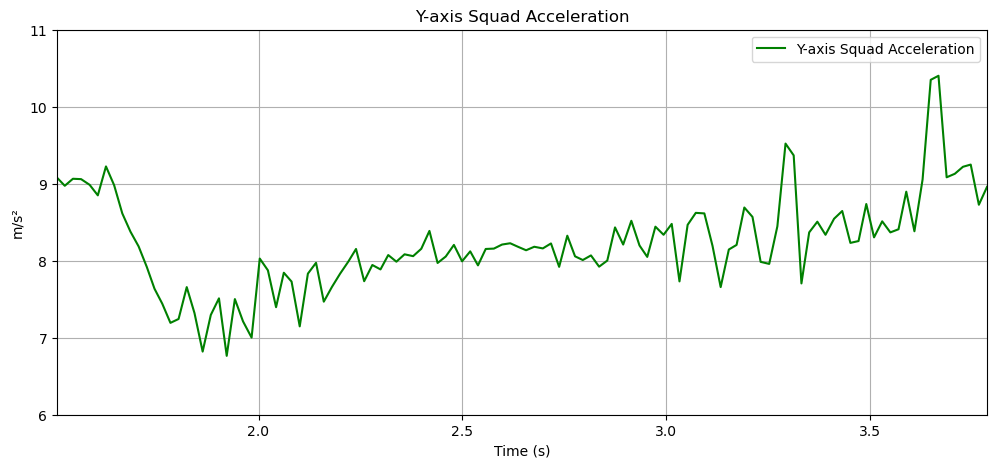

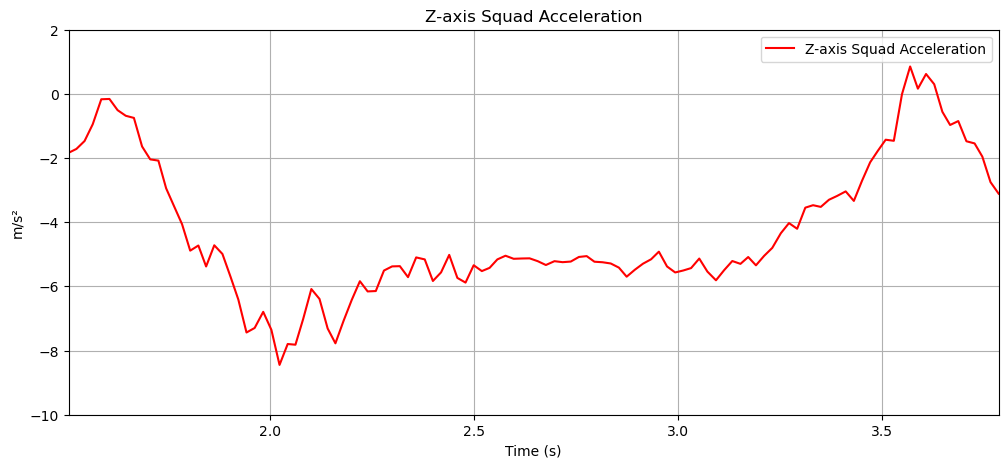

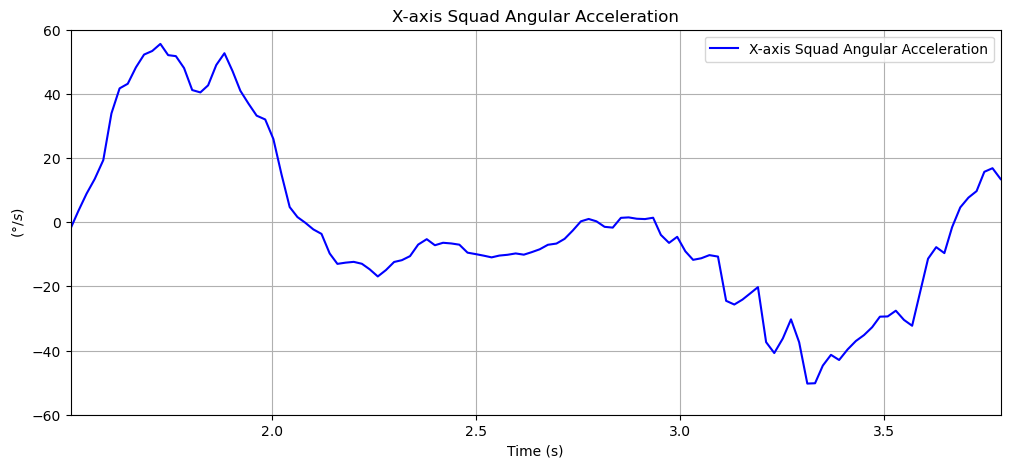

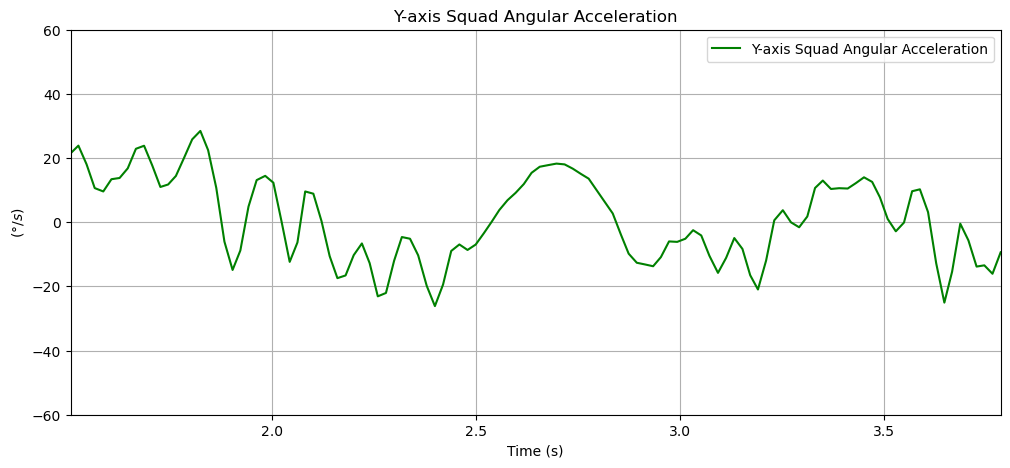

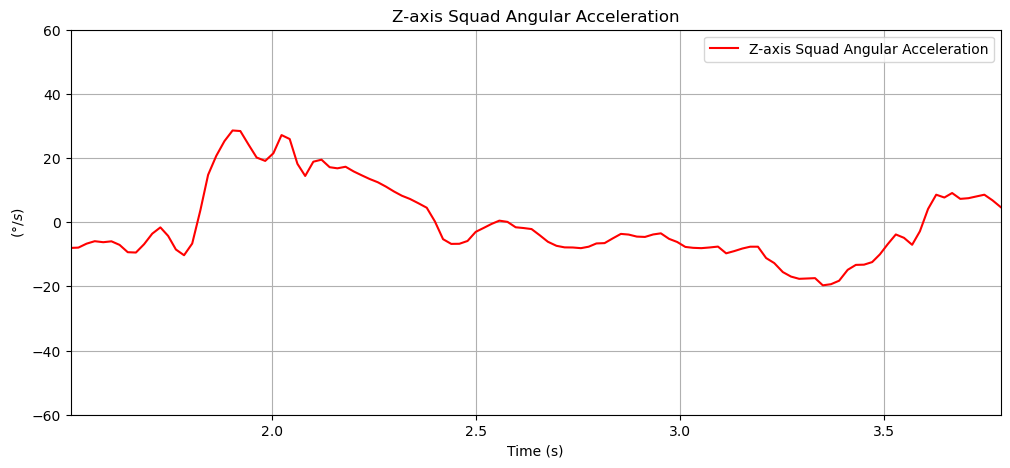

In [6]:
### SEISONTA PHASE ###

# Selecting the periods of time when koehenkilö is standing
mask_seis = ((time > 0) & (time < 1.5)) | ((time > 3.8) & (time < 4.6)) | ((time > 7.2) & (time < 7.8)) | ((time > 10.6) & (time < time.iloc[-1]))
mask_alku = (time > 0) & (time < 1.5)

# Gettin the averages when koehenkilö is standing (just for fun)
mean_gx_seis = gyro_x[mask_seis].mean()
mean_gy_seis = gyro_y[mask_seis].mean()
mean_gz_seis = gyro_z[mask_seis].mean()
mean_ax_seis = acc_x[mask_seis].mean()
mean_ay_seis = acc_y[mask_seis].mean()
mean_az_seis = acc_z[mask_seis].mean()

# Ploting the alku phase:
# Time:
alku_masked = time[mask_alku]
# Columns: 
ax_alku_masked = acc_x[mask_alku]
ay_alku_masked = acc_y[mask_alku]
az_alku_masked = acc_z[mask_alku]
gx_alku_masked = gyro_x[mask_alku]
gy_alku_masked = gyro_y[mask_alku]
gz_alku_masked = gyro_z[mask_alku]

# TESTI just to check that it works:
# print(f'mean in selected period of time (x)= {mean_gx_seis:.3f} deg/s') #.3f = 3 decimals after point

# Calling plot fancy:
plot_column_fancy(
    time=alku_masked, 
    column=ax_alku_masked, 
    ymin=-6, 
    ymax=0, 
    title='X-axis Initial Phase Acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='blue',
    #save_filename='ax-seis.png'
)
plot_column_fancy(
    time=alku_masked, 
    column=ay_alku_masked, 
    ymin=8, 
    ymax=10, 
    title='Y-axis Initial Phase Acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='green',
    #save_filename='ay-seis.png'
)
plot_column_fancy(
    time=alku_masked, 
    column=az_alku_masked, 
    ymin=-6, 
    ymax=0, 
    title='Z-axis Initial Phase Acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='red',
    #save_filename='az-seis.png'
)
plot_column_fancy(
    time=alku_masked, 
    column=gx_alku_masked, 
    ymin=-40, 
    ymax=40, 
    title='X-axis Initial Phase Angular Acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='blue',
    #save_filename='gx-seis.png'
)
plot_column_fancy(
    time=alku_masked, 
    column=gy_alku_masked, 
    ymin=-60, 
    ymax=60, 
    title='Y-axis Initial Phase Angular Acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='green',
    #save_filename='gy-seis.png'
)
plot_column_fancy(
    time=alku_masked, 
    column=gz_alku_masked, 
    ymin=-30, 
    ymax=30, 
    title='Z-axis Initial Phase Angular Acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='red',
    #save_filename='gz-seis.png'
)


### KYYKKY PHASE ###

# Selecting the periods of time when koehenkilö is squatting
mask_kyyk = (time > 1.5) & (time < 3.8) | ((time > 4.6) & (time < 7.2)) | ((time > 7.8) & (time < 10.6)) 
# Only one kyykky:
mask_ekakyyk = (time > 1.5) & (time < 3.8)

# Gettin the average when koehenkilö is squatting
mean_gx_kyyk = gyro_x[mask_kyyk].mean()
mean_gy_kyyk = gyro_y[mask_kyyk].mean()
mean_gz_kyyk = gyro_z[mask_kyyk].mean()
mean_ax_kyyk = acc_x[mask_kyyk].mean()
mean_ay_kyyk = acc_y[mask_kyyk].mean()
mean_az_kyyk = acc_z[mask_kyyk].mean()

# Plotting kyykkyvaihe:
# time for ekäkyykky:
ekakyyk_masked = time[mask_ekakyyk]

# Columns for ekä kyykky:
ax_ekakyyk_masked = acc_x[mask_ekakyyk]
ay_ekakyyk_masked = acc_y[mask_ekakyyk]
az_ekakyyk_masked = acc_z[mask_ekakyyk]
gx_ekakyyk_masked = gyro_x[mask_ekakyyk]
gy_ekakyyk_masked = gyro_y[mask_ekakyyk]
gz_ekakyyk_masked = gyro_z[mask_ekakyyk]

plot_column_fancy(
    time=ekakyyk_masked, 
    column=ax_ekakyyk_masked, 
    ymin=-6, 
    ymax=2, 
    title='X-axis Squad Acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='blue',
    #save_filename='ax-kyyk.png'
)
plot_column_fancy(
    time=ekakyyk_masked, 
    column=ay_ekakyyk_masked, 
    ymin=6, 
    ymax=11, 
    title='Y-axis Squad Acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='green',
    #save_filename='ay-kyyk.png'
)
plot_column_fancy(
    time=ekakyyk_masked, 
    column=az_ekakyyk_masked, 
    ymin=-10, 
    ymax=2, 
    title='Z-axis Squad Acceleration',
    ylabel='m/s\u00B2', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='red',
    #save_filename='az-kyyk.png'
)
plot_column_fancy(
    time=ekakyyk_masked, 
    column=gx_ekakyyk_masked, 
    ymin=-60, 
    ymax=60, 
    title='X-axis Squad Angular Acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='blue',
    #save_filename='gx-kyyk.png'
)
plot_column_fancy(
    time=ekakyyk_masked, 
    column=gy_ekakyyk_masked, 
    ymin=-60, 
    ymax=60, 
    title='Y-axis Squad Angular Acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='green',
    #save_filename='gy-kyyk.png'
)
plot_column_fancy(
    time=ekakyyk_masked, 
    column=gz_ekakyyk_masked, 
    ymin=-60, 
    ymax=60, 
    title='Z-axis Squad Angular Acceleration',
    ylabel='($\degree/s$)', 
    xlabel='Time (s)', 
    shade_ranges=None,  
    shade_colors=None,   
    shade_labels=None,  
    line_color='red',
    #save_filename='gz-kyyk.png'
)


## T. 2 Liikealgoritmit
1. Ladatkaa orientation.py-tiedosto ja lukekaa se sisään Jupyter Notebookiin (import orientation).
2. Valitkaa joko kvaternioihin tai kiertomatriiseihin perustuva algoritmi.
3. Laskekaa datasta suuntakulmat (orientaatio) pysty- ja vaakasuunnassa käyttäen valittua algoritmia.

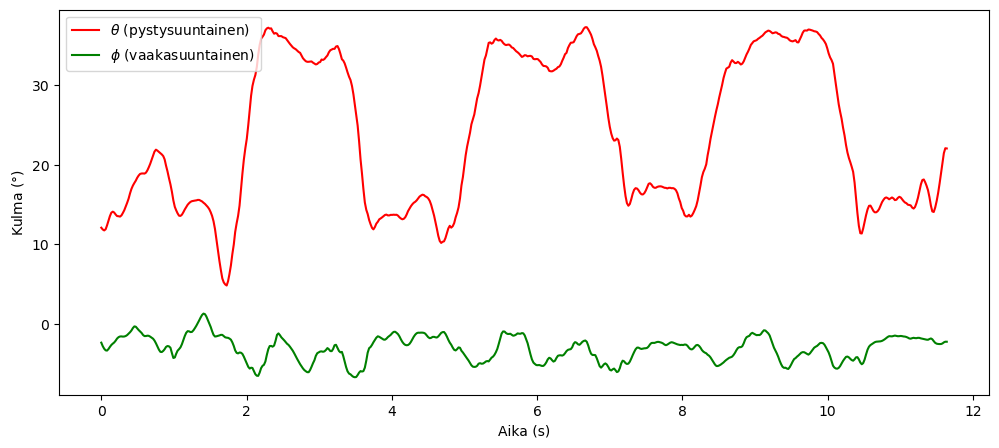

In [7]:
# Let´s invite Juha´s funktions to the party:
time, gx, gy, gz, wx, wy, wz = get_components(df) # And set our data as a parameter, "(df)", then Juha's functions will do the rest.

theta, phi = calc_angles(time, gy, gx, gz, wy, wx, wz) ### HUOM!!!! gy, gx and wy, wx change their places!!! because we put the sensor 90 degree turned in comparation with Juha.
plot_angles(time, theta, phi) # Tämä funktio muuttaa Thetan etumerkin koska muuten olisi negatiivisena kaavassa


4. Esittäkää tulokset yhdessä kuvassa, jossa on kaksi kuvaajaa. Ylempi kuvaaja kuvaa liikettä pystysuunnassa ja alempi vaakasuunnassa.
5. Muotoilkaa kuvaajat:
    - Tarkistakaa kuvan koko.
    - Lisätkää kuvaajille ja akseleille otsikot. Huomioikaa yksiköt.
    - Varmistakaa, että kuvaajien x-akseleilla näkyy aika sekunteina 5 sekunnin välein

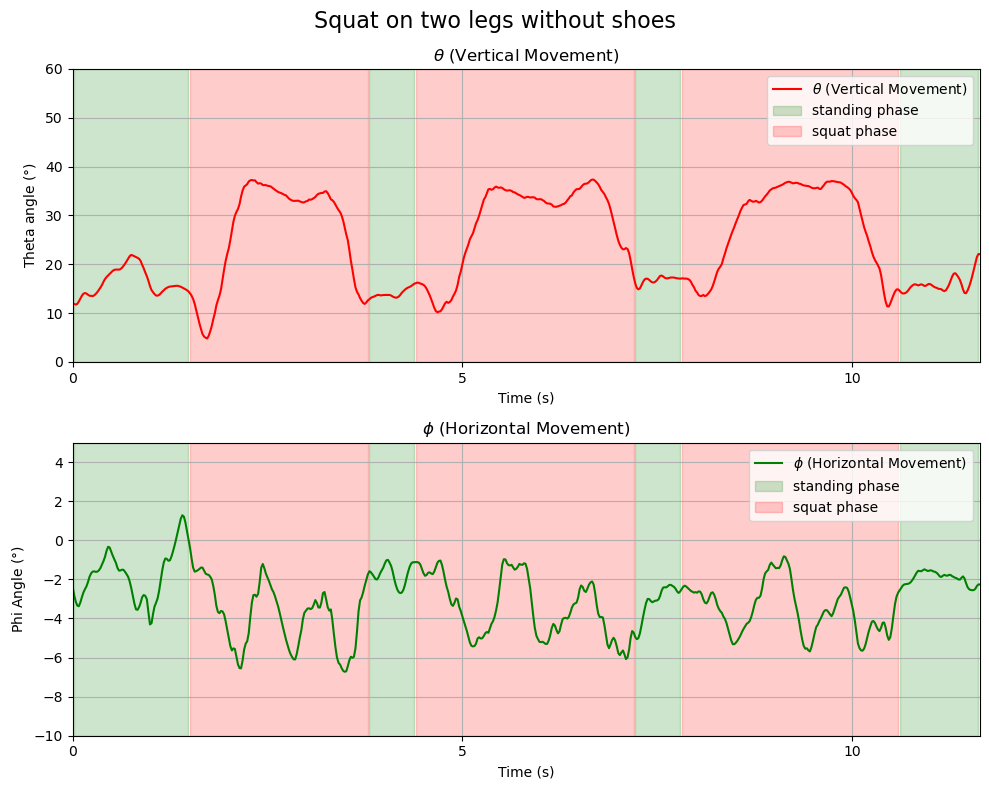

In [8]:
def subplot_column_fancy(time, column, ymin, ymax, title, ylabel, xlabel, #function is made to work with lists, no with dataframes
                      mean=None, std=None, wmax=None, wmin=None, # Almost same function than "plot_column_fancy()" but made for arrays and subplots
                      shade_ranges=None, shade_colors=None, shade_labels=None, 
                      shade_alpha=0.2, line_color='blue', axes=None):
    
    ax = axes if axes is not None else plt.gca()  # Use provided Axes or get current Axes

    ax.plot(time, column, label=title, color=line_color)  # Plot the main data line

    used_labels = set()
    if shade_ranges is not None:
        for i, shade_range in enumerate(shade_ranges):
            color = shade_colors[i] if shade_colors and i < len(shade_colors) else 'green'
            label_index = i % len(shade_labels) if shade_labels else 0
            label = shade_labels[label_index] if shade_labels else f'Shade Area {i+1}'
            if label not in used_labels:
                ax.fill_between(time, ymin, ymax,
                                where=(time > shade_range[0]) & (time < shade_range[1]),
                                color=color, alpha=shade_alpha, label=label)
                used_labels.add(label)
            else:
                ax.fill_between(time, ymin, ymax,
                                where=(time > shade_range[0]) & (time < shade_range[1]),
                                color=color, alpha=shade_alpha)

    if mean is not None:
        ax.axhline(mean, color='steelblue', label=f'mean = {mean:.2f}')
    if std is not None:
        ax.fill_between(time, mean-std, mean+std, alpha=0.2, color='cyan', label=f'std = {std:.2f}')
    if wmax is not None:
        ax.axhline(wmax, color='red', linestyle=':', label=f'max = {wmax:.2f}')
    if wmin is not None:
        ax.axhline(wmin, color='green', linestyle=':', label=f'min = {wmin:.2f}')

    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.set_xlim(time[0], time[-1]) # If dataframe then .values must be used: time.values[0] 
    ax.set_ylim(ymin, ymax)
    
# Creates a figure and a set of subplots   
fig, axs = plt.subplots(2, 1, figsize=(10, 8)) # 2 rows, 1 column, and setting figure size

# Determines the x-ticks (every 5 seconds)
# If 'time' is a numpy array then:
max_time = time[-1] if len(time) > 0 else 0 # If dataframe then .values must be used: time.values[0]
x_ticks = np.arange(0, max_time + 5, 5)  # Create ticks every 5 seconds
axs[0].set_xticks(x_ticks) # Setting x-ticks for both subplots
axs[1].set_xticks(x_ticks)

subplot_column_fancy(
    time = time, 
    column = -np.array(theta),  # NOTE! Minus sign! "-np.array(theta)". Otherwise, the angles are negative.
    ymin = 0, 
    ymax = 60, 
    title = '$\\theta$ (Vertical Movement)', 
    ylabel = 'Theta angle ($\degree$)', 
    xlabel = 'Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time[-1])], #If dataframe then .iloc must be used: (10.6,time.iloc[-1])]
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'], 
    shade_alpha=0.2, 
    line_color='red', 
    axes=axs[0]
)
subplot_column_fancy(
    time = time, 
    column = phi,  
    ymin = -10, 
    ymax = 5, 
    title = '$\\phi$ (Horizontal Movement)', 
    ylabel = 'Phi Angle ($\degree$)', 
    xlabel = 'Time (s)', 
    shade_ranges=[(0, 1.5), (1.5, 3.8), (3.8,4.4),(4.4,7.2),(7.2,7.8),(7.8,10.6),(10.6,time[-1])], #If dataframe then .iloc must be used: (10.6,time.iloc[-1])]
    shade_colors=['green', 'red', 'green', 'red','green', 'red','green'],   
    shade_labels=['standing phase', 'squat phase'], 
    shade_alpha=0.2, 
    line_color='green', 
    axes=axs[1]
)



fig.suptitle('Squat on two legs without shoes', fontsize=16) # Sets a main title
plt.tight_layout() # Adjusts the padding between and around subplots to make the layout tight and neat.

plt.savefig('phitheta.png', format='png')
plt.show()